In [31]:
# ==========================================================
# Import Libraries
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Optional: pengaturan tampilan & style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


# EDA (Explaratory Data Analysis)

In [32]:
# ==========================================================
# 1. Load Dataset
# ==========================================================
# Contoh: dataset dalam format CSV
df = pd.read_csv('./big_five_datasets.csv', sep="\t")

print("Shape:", df.shape)

# Tampilkan 5 baris pertama, tapi hanya beberapa kolom
cols_to_show = ['EXT1','EST1','AGR1','CSN1','OPN1']  # contoh kolom
df[cols_to_show].head()

Shape: (1015341, 110)


,EXT1,EST1,AGR1,CSN1,OPN1
0,4.0,1.0,2.0,3.0,5.0
1,3.0,2.0,1.0,3.0,1.0
2,2.0,4.0,1.0,4.0,5.0
3,2.0,3.0,2.0,2.0,4.0
4,3.0,1.0,1.0,5.0,5.0


In [33]:
# ==========================================================
# 2. Basic Info
# ==========================================================
print("\n=== Informasi Dataset ===")
df.info()

print("\n=== Statistik Deskriptif ===")
df.describe(include='all').T


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB

=== Statistik Deskriptif ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EXT1,1013558.0,NaN,NaN,NaN,2.648067,1.264407,0.0,1.0,3.0,4.0,5.0
EXT2,1013558.0,NaN,NaN,NaN,2.773115,1.323943,0.0,2.0,3.0,4.0,5.0
EXT3,1013558.0,NaN,NaN,NaN,3.288349,1.215006,0.0,2.0,3.0,4.0,5.0
EXT4,1013558.0,NaN,NaN,NaN,3.140595,1.237442,0.0,2.0,3.0,4.0,5.0
EXT5,1013558.0,NaN,NaN,NaN,3.27696,1.277593,0.0,2.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
endelapse,1015341.0,NaN,NaN,NaN,2701.409845,1483898.061344,1.0,9.0,13.0,18.0,1493327022.0
IPC,1015341.0,NaN,NaN,NaN,10.452109,39.828787,1.0,1.0,1.0,2.0,725.0
country,1015264,223,US,546403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat_appx_lots_of_err,1015341,30759,38.0,126025,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# ==========================================================
# 3. Grouping Columns by Traits
# ==========================================================
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']

trait_cols = {
    t: [c for c in df.columns if c.startswith(t)]
    for t in traits
}

# Tampilkan contoh kolom tiap trait
for t, cols in trait_cols.items():
    print(f"{t}: {len(cols)} kolom → {cols[:5]}...")


EXT: 20 kolom → ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5']...
EST: 20 kolom → ['EST1', 'EST2', 'EST3', 'EST4', 'EST5']...
AGR: 20 kolom → ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5']...
CSN: 20 kolom → ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5']...
OPN: 20 kolom → ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5']...


In [35]:
# ==========================================================
# 4. Pembersihan Data
# ==========================================================

irrelevant_cols = ['dateload','screenw','screenh','introelapse','testelapse','endelapse',
                'IPC','country','lat_appx_lots_of_err','long_appx_lots_of_err']
df.drop(columns=irrelevant_cols, inplace=True, errors='ignore')

# Hapus duplikat
df.drop_duplicates(inplace=True)

# Cek hasil
print("Shape setelah pembersihan:", df.shape)
df.head()

Shape setelah pembersihan: (1011468, 100)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0


In [37]:
# ==========================================================
# 5. Missing Value
# ==========================================================
# Cek jumlah missing value
print("Missing values per kolom:")
print(df.isnull().sum())

# Kolom numerik
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
# Kolom kategorik
categorical_cols = df.select_dtypes(include=['object']).columns

# Isi missing value numerik dengan median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Cek dulu apakah ada kolom kategorik
if len(categorical_cols) > 0:
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verifikasi
print("Missing values setelah penanganan:", df.isnull().sum().sum())


Missing values per kolom:
EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
          ..
OPN6_E     0
OPN7_E     0
OPN8_E     0
OPN9_E     0
OPN10_E    0
Length: 100, dtype: int64
Missing values setelah penanganan: 0


C:\Users\User\AppData\Local\Temp\ipykernel_19876\1831368589.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t + '_MEAN'] = df[cols].mean(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_19876\1831368589.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[t + '_MEAN'] = df[cols].mean(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_19876\1831368589.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

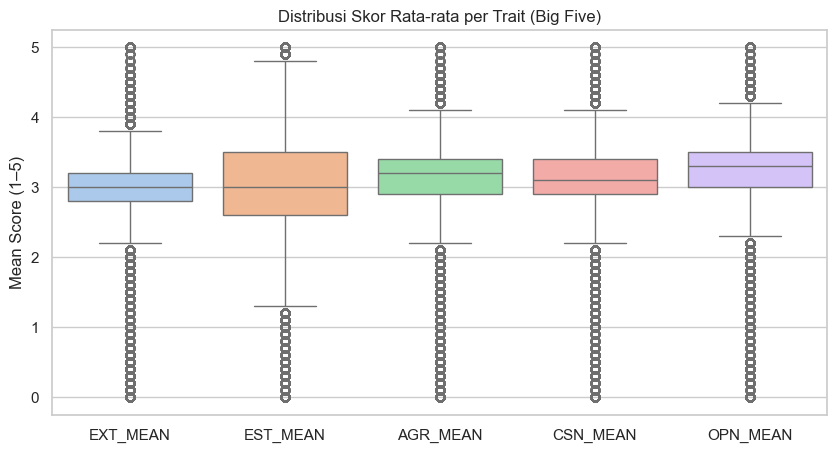

In [38]:
# ==========================================================
# 6. Distribusi Domain
# ==========================================================
for t in traits:
    cols = [c for c in df.columns if c.startswith(t) and not c.endswith('_E')]
    df[t + '_MEAN'] = df[cols].mean(axis=1)

plt.figure(figsize=(10,5))
sns.boxplot(data=df[[t + '_MEAN' for t in traits]])
plt.title("Distribusi Skor Rata-rata per Trait (Big Five)")
plt.ylabel("Mean Score (1–5)")
plt.show()


📊 Jumlah fitur numerik: 105


<Figure size 1800x2000 with 0 Axes>

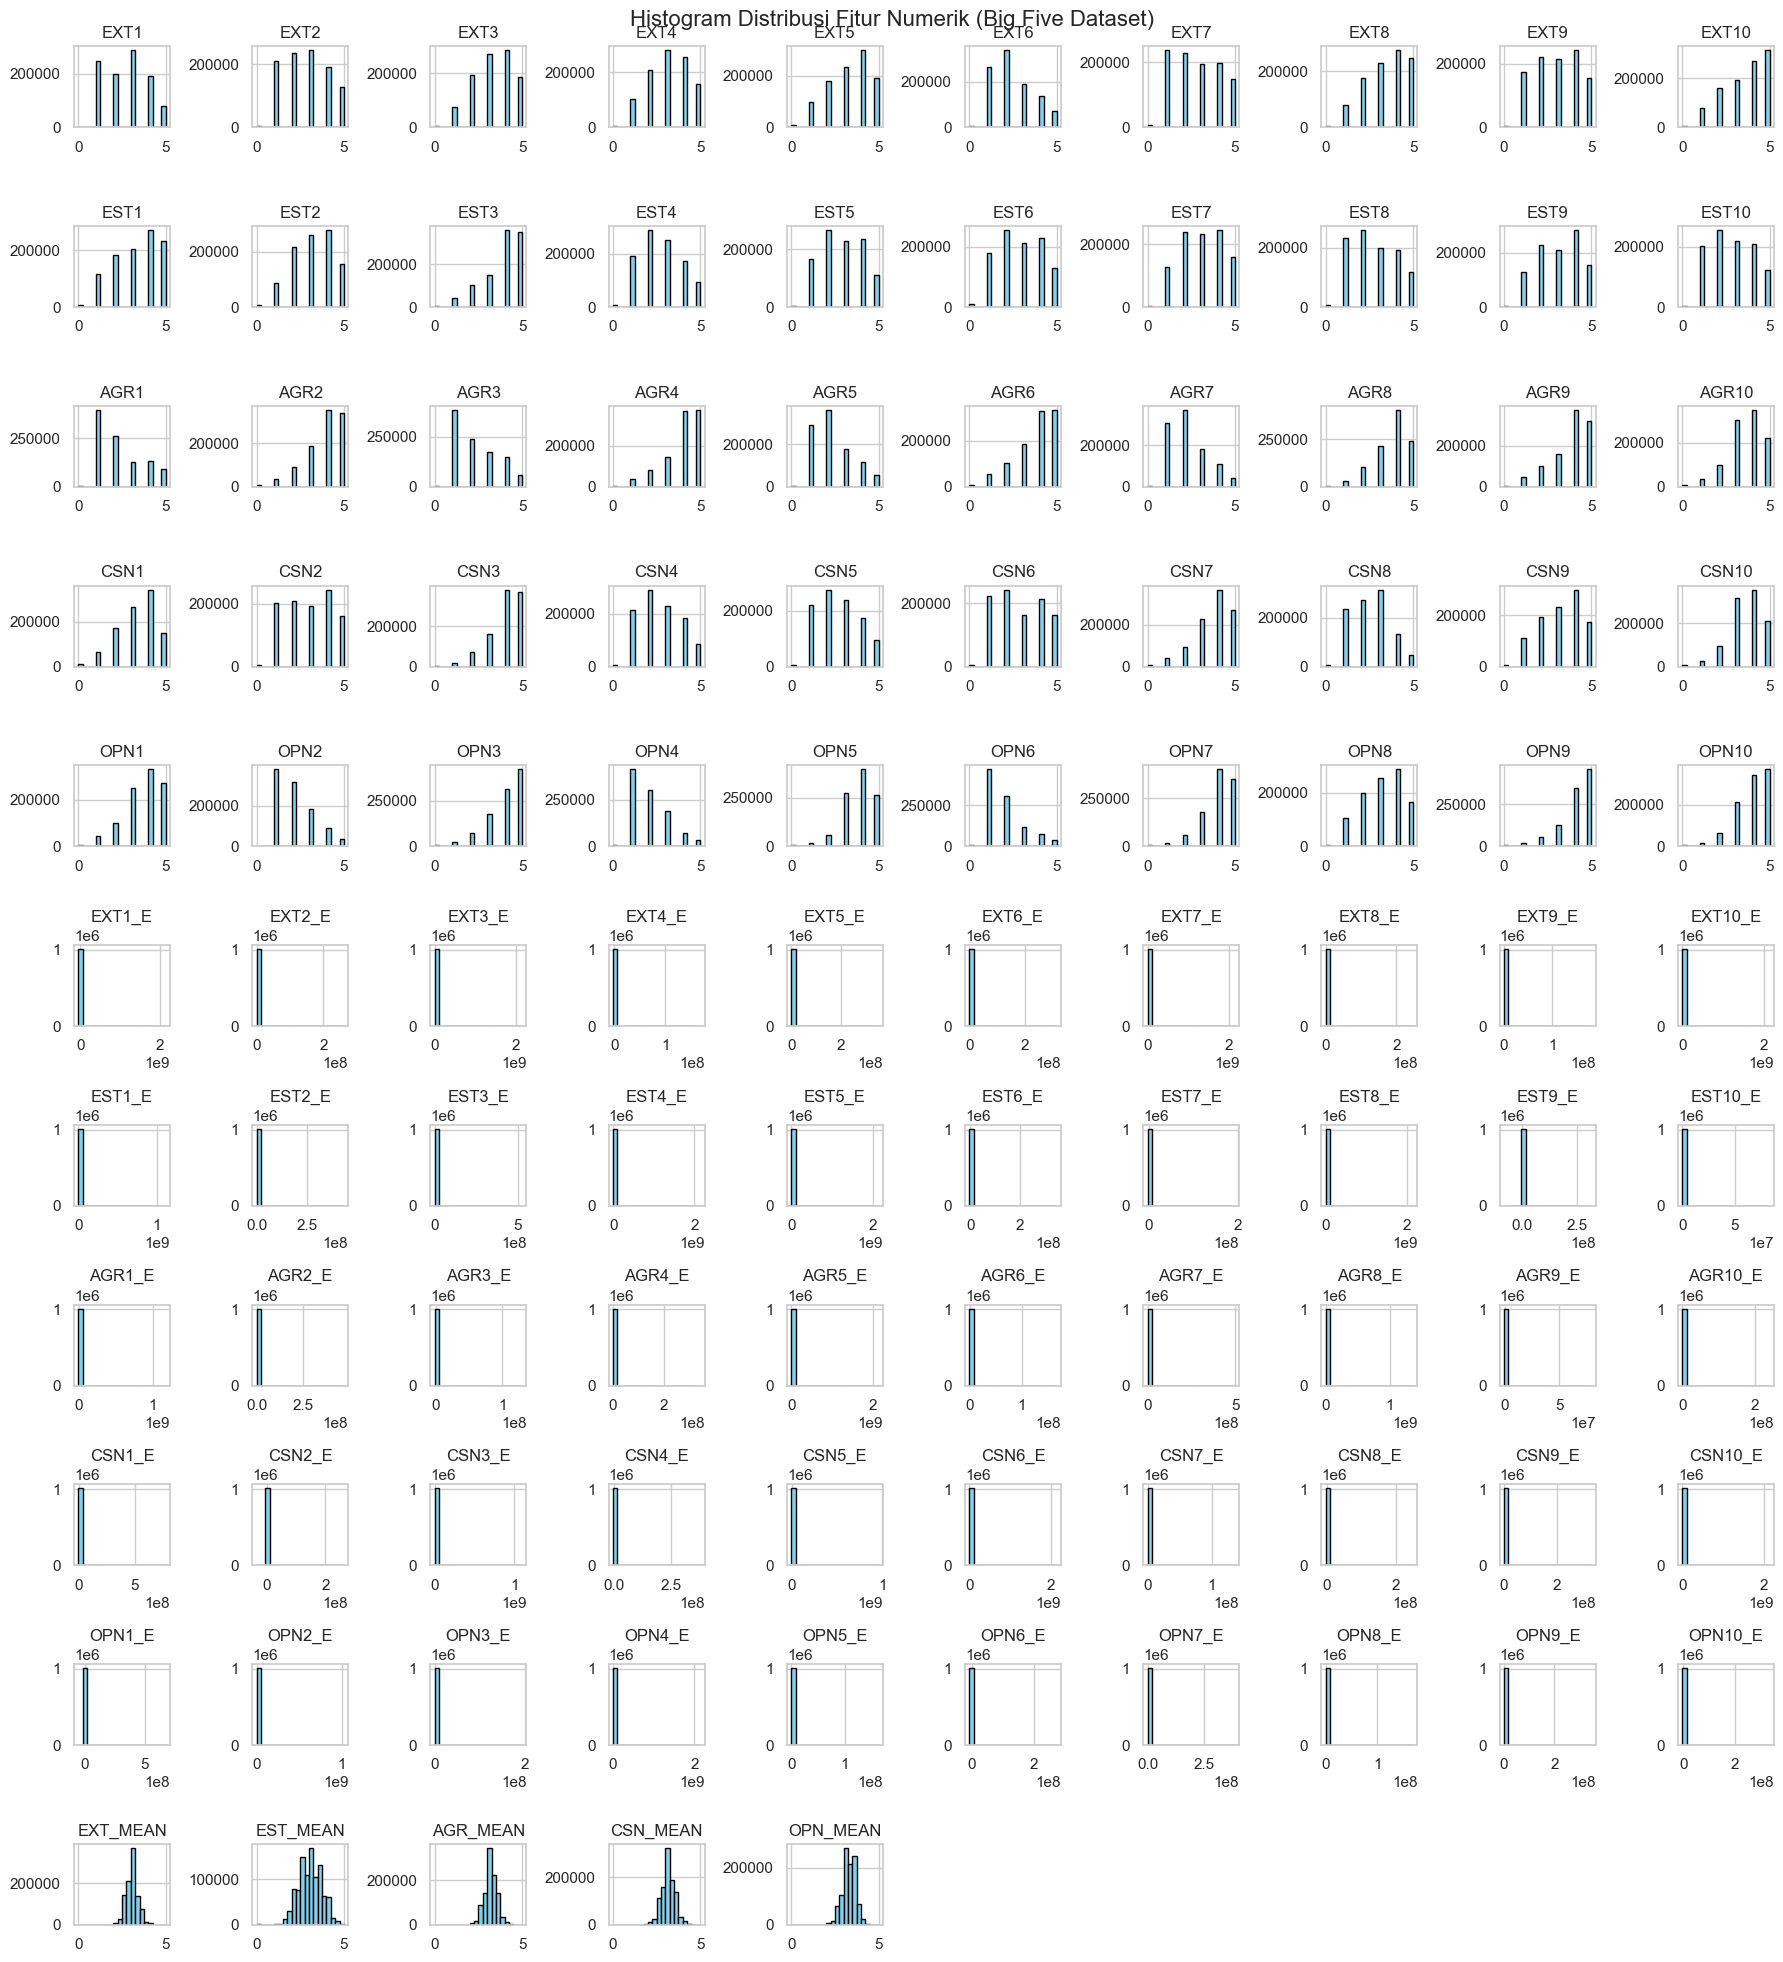

In [39]:
# ==========================================================
# 7. Histogram Fitur Numerik
# ==========================================================
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Tampilkan informasi jumlah kolom numerik
print(f"📊 Jumlah fitur numerik: {len(numeric_cols)}")

# Buat histogram untuk setiap fitur numerik
plt.figure(figsize=(18, 20))
df[numeric_cols].hist(
    bins=20,
    figsize=(18, 20),
    color='skyblue',
    edgecolor='black'
)
plt.suptitle("Histogram Distribusi Fitur Numerik (Big Five Dataset)", fontsize=16)
plt.tight_layout()
plt.show()


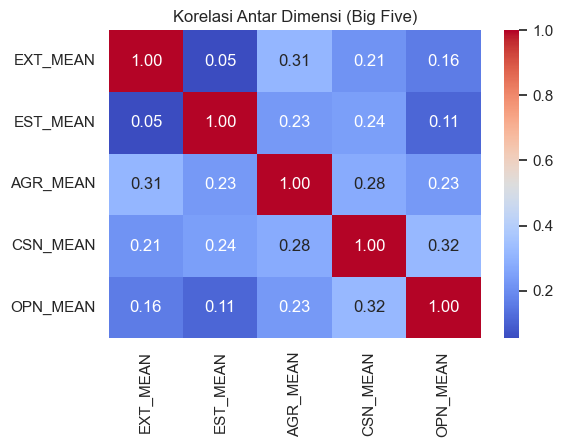

In [40]:
# ==========================================================
# 8. Korelasi Antar Fitur
# ==========================================================
trait_means = df[[t + '_MEAN' for t in traits]]
plt.figure(figsize=(6,4))
sns.heatmap(trait_means.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Dimensi (Big Five)")
plt.show()


Outlier telah ditangani dengan metode clipping


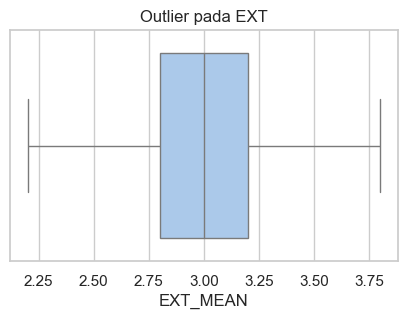

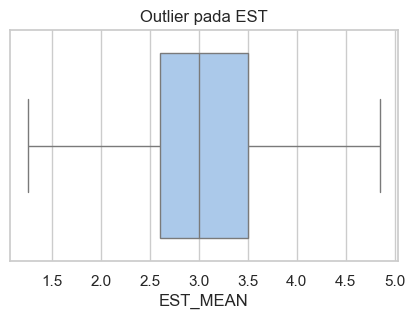

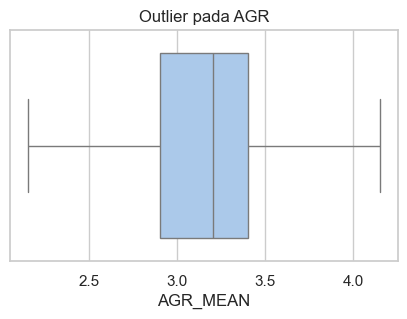

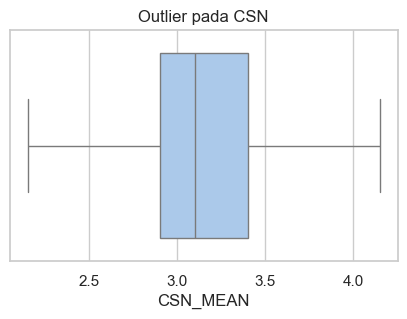

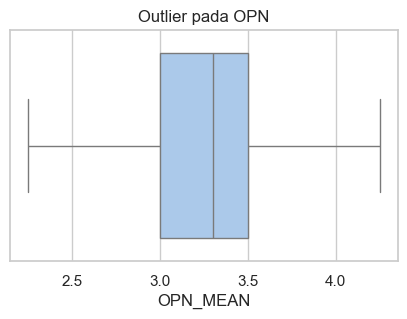

In [41]:
# ==========================================================
# 9. Outlier Detection dan Penanganan Outlier
# ==========================================================
# Gunakan IQR untuk mendeteksi outlier
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip outlier ke batas bawah/atas
    df[col] = np.clip(df[col], lower_bound, upper_bound)

print("Outlier telah ditangani dengan metode clipping")
for t in traits:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[t + '_MEAN'])
    plt.title(f"Outlier pada {t}")
    plt.show()


In [42]:
# ==========================================================
# 10. Normalisasi Data
# ==========================================================

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Data telah dinormalisasi")
df[numeric_cols].head()

Data telah dinormalisasi


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,EXT_MEAN,EST_MEAN,AGR_MEAN,CSN_MEAN,OPN_MEAN
0,1.068657,-1.348304,1.412440,-0.932213,1.351185,-1.150490,1.591962,-1.125116,0.768386,-1.977402,-1.712675,0.678416,0.126468,-0.536060,-0.669169,-0.640869,-0.821101,-0.514613,-0.073491,-0.590979,-0.194367,1.028879,-0.207611,0.057785,-0.235923,-0.619555,-0.179332,0.272062,-0.689865,0.372101,-0.329064,0.767935,-0.954743,-0.499622,-0.496911,0.823311,0.263459,-0.415743,0.624559,0.385505,1.167005,-0.973383,-0.007672,-0.923164,0.203692,-0.895381,1.022336,-0.151409,-0.239192,1.013320,-0.022392,0.652830,-0.056943,0.287547,1.021906,-0.441362,-0.963067,-0.898627,0.707724,0.181819,0.892106,-0.040170,1.260558,0.647211,-0.200192,0.583049,0.949802,0.367105,-0.379814,0.464033,-0.173276,0.696318,2.238658,-0.317304,-0.598448,-0.088185,2.262029,0.565061,-0.947726,-0.386980,0.904009,0.184814,-1.056207,-0.813096,-0.211612,-0.209376,2.282689,-0.055067,0.860161,0.501987,-0.210368,-0.336580,-0.195233,-0.411704,-0.625859,0.462812,0.333505,-0.219248,-0.394247,1.101086,-0.093653,-0.966219,-0.184942,0.176378,0.061223
1,0.274994,1.683601,-0.244497,0.693182,-0.223356,0.486011,-0.556867,1.248795,-1.469284,1.107715,-0.965674,-0.140520,0.126468,-1.337064,0.119075,-1.397501,-0.821101,-1.261504,-0.073491,-1.349412,-0.942072,0.142681,-0.992231,0.954923,-1.092190,1.030861,0.715907,0.272062,1.041457,-0.621917,-0.329064,-0.675995,0.986836,0.302017,0.290295,-1.301634,-0.632074,0.507960,1.412431,-0.632032,-2.322235,-0.072268,-0.007672,-0.003676,-0.818441,-0.895381,0.015536,-0.952485,0.939366,-0.947813,-0.359170,-0.184562,-0.342951,-0.655027,-0.294238,-0.296305,-0.070649,-0.432082,-0.340609,-0.209372,2.089734,-0.751849,0.084190,-0.399383,-0.460706,-0.564332,0.244597,-0.281952,-0.795416,-0.812935,-0.937570,-0.793314,-0.760587,-0.453286,-0.513419,0.947295,0.087059,-0.336992,-0.902060,-1.004991,0.351285,0.106828,1.649592,-0.514681,-0.073784,-0.581493,-0.034530,-0.727438,-0.003882,0.255840,-0.459923,0.000429,-0.815200,-0.568752,0.718372,-0.268802,-0.502735,-0.085340,-0.343930,0.243965,1.123319,-1.424986,0.099564,-0.087341,-1.533754
2,-0.518669,0.167648,0.583971,0.693182,-0.223356,-0.332240,-1.273143,-0.333812,-0.723394,1.107715,0.528328,0.678416,0.126468,-0.536060,-0.669169,-0.640869,-0.821101,-0.514613,-1.622832,0.167454,-0.942072,0.142681,-0.992231,0.057785,-0.235923,0.205653,-1.074572,0.272062,0.175796,-0.621917,0.603370,-0.675995,-1.925532,-0.499622,0.290295,0.114996,0.263459,-0.415743,0.624559,-1.649570,1.167005,-0.973383,-1.854125,-0.923164,0.203692,0.213904,1.022336,-0.151409,-0.239192,0.032754,-0.756704,-0.206237,-0.685805,-0.333040,1.139785,-0.547934,-0.020430,-0.468066,2.287326,-0.755380,0.476383,-0.234004,0.062280,0.014030,1.795635,-0.724812,-0.735938,-1.158644,0.266795,-0.820415,-1.252783,-0.743586,-0.178941,-1.046222,-0.853535,-0.974663,-0.534112,2.279359,0.111530,0.085099,0.014427,-0.060284,-0.507274,-0.500992,-0.019623,0.500995,-0.381045,-0.933085,-0.526140,-0.608319,-0.791708,-1.289969,-0.834650,-1.116585,-0.595023,1.938047,-0.831293,1.430717,-1.074977,-0.070634,-0.397896,-0.660374,-1.038460,-0.878496,-0.470436
3,-0.518669,-0.590328,-1.072966,-0.119516,0.563915,-0.332240,-0.556867,0.457491,-1.469284,0.336436,-0.218673,-0.140520,-0.742071,-0.536060,0.119075,-0.640869,-0.821101,-0.514613,0.701179,0.167454,-0.194367,0.142681,0.577008,0.057785,-0.235923,0.205653,-0.179332,0.272062,-0.689865,0.372101,-1.261498,0.7679

In [ ]:
# ==========================================================
# 11. Insight Awal
# ==========================================================
print("=== Rangkuman Hasil EDA ===")
print(f"- Jumlah responden: {len(df)}")
print(f"- Trait paling variatif (std tertinggi): {df[[t + '_MEAN' for t in traits]].std().idxmax()}")
print(f"- Trait paling stabil (std terendah): {df[[t + '_MEAN' for t in traits]].std().idxmin()}")


=== Rangkuman Hasil EDA ===
- Jumlah responden: 1011468
- Trait dengan korelasi tertinggi Asli vs Estimasi: EXT (nan)
- Trait paling variatif (std tertinggi): CSN_MEAN
- Trait paling stabil (std terendah): EXT_MEAN


# Build Model Classification

In [44]:
# ==========================================================
# 1. Load Dataset
# ==========================================================
# Gunakan separator sesuai dataset kamu
print("✅ Data loaded:", df.shape)
df.head(3)

✅ Data loaded: (1011468, 105)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,EXT_MEAN,EST_MEAN,AGR_MEAN,CSN_MEAN,OPN_MEAN
0,1.068657,-1.348304,1.412440,-0.932213,1.351185,-1.150490,1.591962,-1.125116,0.768386,-1.977402,-1.712675,0.678416,0.126468,-0.536060,-0.669169,-0.640869,-0.821101,-0.514613,-0.073491,-0.590979,-0.194367,1.028879,-0.207611,0.057785,-0.235923,-0.619555,-0.179332,0.272062,-0.689865,0.372101,-0.329064,0.767935,-0.954743,-0.499622,-0.496911,0.823311,0.263459,-0.415743,0.624559,0.385505,1.167005,-0.973383,-0.007672,-0.923164,0.203692,-0.895381,1.022336,-0.151409,-0.239192,1.013320,-0.022392,0.652830,-0.056943,0.287547,1.021906,-0.441362,-0.963067,-0.898627,0.707724,0.181819,0.892106,-0.040170,1.260558,0.647211,-0.200192,0.583049,0.949802,0.367105,-0.379814,0.464033,-0.173276,0.696318,2.238658,-0.317304,-0.598448,-0.088185,2.262029,0.565061,-0.947726,-0.386980,0.904009,0.184814,-1.056207,-0.813096,-0.211612,-0.209376,2.282689,-0.055067,0.860161,0.501987,-0.210368,-0.336580,-0.195233,-0.411704,-0.625859,0.462812,0.333505,-0.219248,-0.394247,1.101086,-0.093653,-0.966219,-0.184942,0.176378,0.061223
1,0.274994,1.683601,-0.244497,0.693182,-0.223356,0.486011,-0.556867,1.248795,-1.469284,1.107715,-0.965674,-0.140520,0.126468,-1.337064,0.119075,-1.397501,-0.821101,-1.261504,-0.073491,-1.349412,-0.942072,0.142681,-0.992231,0.954923,-1.092190,1.030861,0.715907,0.272062,1.041457,-0.621917,-0.329064,-0.675995,0.986836,0.302017,0.290295,-1.301634,-0.632074,0.507960,1.412431,-0.632032,-2.322235,-0.072268,-0.007672,-0.003676,-0.818441,-0.895381,0.015536,-0.952485,0.939366,-0.947813,-0.359170,-0.184562,-0.342951,-0.655027,-0.294238,-0.296305,-0.070649,-0.432082,-0.340609,-0.209372,2.089734,-0.751849,0.084190,-0.399383,-0.460706,-0.564332,0.244597,-0.281952,-0.795416,-0.812935,-0.937570,-0.793314,-0.760587,-0.453286,-0.513419,0.947295,0.087059,-0.336992,-0.902060,-1.004991,0.351285,0.106828,1.649592,-0.514681,-0.073784,-0.581493,-0.034530,-0.727438,-0.003882,0.255840,-0.459923,0.000429,-0.815200,-0.568752,0.718372,-0.268802,-0.502735,-0.085340,-0.343930,0.243965,1.123319,-1.424986,0.099564,-0.087341,-1.533754
2,-0.518669,0.167648,0.583971,0.693182,-0.223356,-0.332240,-1.273143,-0.333812,-0.723394,1.107715,0.528328,0.678416,0.126468,-0.536060,-0.669169,-0.640869,-0.821101,-0.514613,-1.622832,0.167454,-0.942072,0.142681,-0.992231,0.057785,-0.235923,0.205653,-1.074572,0.272062,0.175796,-0.621917,0.603370,-0.675995,-1.925532,-0.499622,0.290295,0.114996,0.263459,-0.415743,0.624559,-1.649570,1.167005,-0.973383,-1.854125,-0.923164,0.203692,0.213904,1.022336,-0.151409,-0.239192,0.032754,-0.756704,-0.206237,-0.685805,-0.333040,1.139785,-0.547934,-0.020430,-0.468066,2.287326,-0.755380,0.476383,-0.234004,0.062280,0.014030,1.795635,-0.724812,-0.735938,-1.158644,0.266795,-0.820415,-1.252783,-0.743586,-0.178941,-1.046222,-0.853535,-0.974663,-0.534112,2.279359,0.111530,0.085099,0.014427,-0.060284,-0.507274,-0.500992,-0.019623,0.500995,-0.381045,-0.933085,-0.526140,-0.608319,-0.791708,-1.289969,-0.834650,-1.116585,-0.595023,1.938047,-0.831293,1.430717,-1.074977,-0.070634,-0.397896,-0.660374,-1.038460,-0.878496,-0.470436


In [45]:
# ==========================================================
# 2. Feature & Target Selection
# ==========================================================
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']

mean_cols = {
    f"{t}_MEAN": df[[f"{t}{i}" for i in range(1, 11)]].mean(axis=1)
    for t in traits
}

df = pd.concat([df, pd.DataFrame(mean_cols)], axis=1)

# Dominant trait
df['dominant_trait'] = df[[f'{t}_MEAN' for t in traits]].idxmax(axis=1)
df['dominant_trait'] = df['dominant_trait'].str.replace('_MEAN', '')

X = df[[col for col in df.columns if any(tr in col for tr in traits) and '_E' not in col and '_MEAN' not in col]]
y = df['dominant_trait']

In [46]:
# ==========================================================
# 3. Split Train-Test & Train Model Random Forest (Murni)
# ==========================================================

# Pastikan semua fitur numerik
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Shape X_train:", X_train.shape)
print("Shape X_val:", X_val.shape)
print("Shape X_test:", X_test.shape)

# ==========================================================
# Buat model Random Forest
# ==========================================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='log2',
    class_weight='balanced_subsample',
    criterion='gini',
    random_state=42,
    n_jobs=4
)

# 2️⃣ Latih model
model.fit(X_train, y_train)

# 3️⃣ Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test,
    y_pred,
    target_names=[str(label) for label in le.classes_]
))

# 4️⃣ Simpan model Random Forest
joblib.dump(model, 'rf_model.pkl', compress=('xz', 3))
print("💾 Model Random Forest disimpan sebagai rf_model.pkl")


Shape X_train: (708027, 50)
Shape X_val: (151720, 50)
Shape X_test: (151721, 50)
✅ Accuracy: 0.6711463805274155
              precision    recall  f1-score   support

         AGR       0.66      0.59      0.62     27291
         CSN       0.69      0.57      0.63     27989
         EST       0.68      0.83      0.75     31871
         EXT       0.67      0.62      0.64     33256
         OPN       0.66      0.72      0.69     31314

    accuracy                           0.67    151721
   macro avg       0.67      0.67      0.67    151721
weighted avg       0.67      0.67      0.67    151721

💾 Model Random Forest disimpan sebagai rf_model.pkl


# Model Evaluation

📊 Evaluasi Model Random Forest
Accuracy : 0.7082
Precision: 0.7087
Recall   : 0.7082
F1-Score : 0.707

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.63      0.61      0.62     34491
           1       0.65      0.60      0.63     28944
           2       0.79      0.87      0.83     54079
           3       0.58      0.65      0.61     27367
           4       0.77      0.70      0.73     58188

    accuracy                           0.71    203069
   macro avg       0.68      0.69      0.68    203069
weighted avg       0.71      0.71      0.71    203069



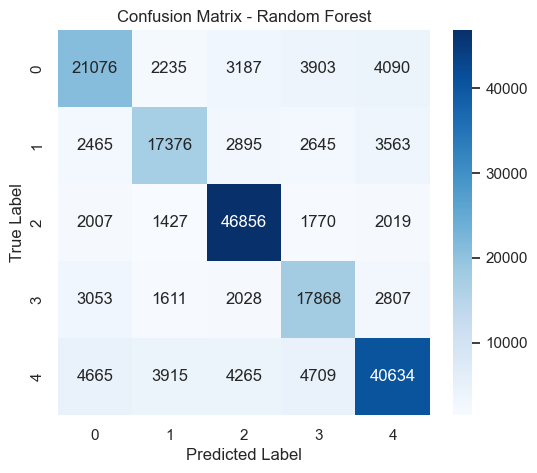

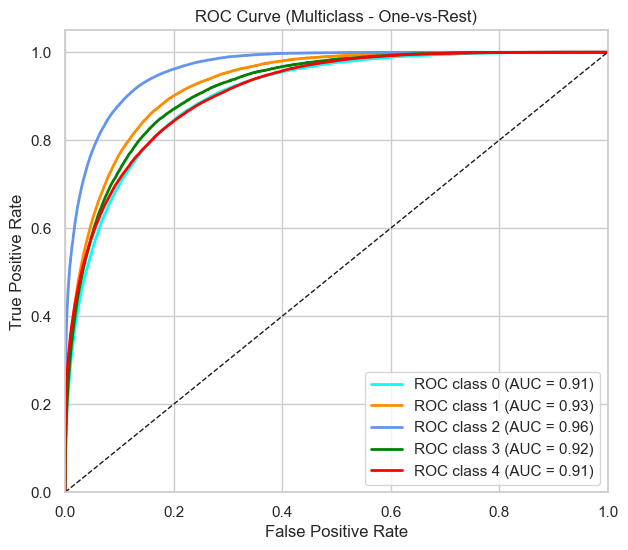

In [22]:
# ==========================================================
# Evaluasi Model Random Forest (Multiclass Support)
# ==========================================================

# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi metrik utama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("📊 Evaluasi Model Random Forest")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1-Score :", round(f1, 4))

# Classification report
print("\n=== Classification Report ===")
print(classification_report(
    y_test,
    y_pred,
    target_names=[str(label) for label in le.classes_]
))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ==========================================================
# ROC Curve (One-vs-Rest untuk multiclass)
# ==========================================================


# Binarisasi label (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_score = model.predict_proba(X_test)

# Hitung ROC per kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve per kelas
plt.figure(figsize=(7, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(len(le.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color,
        lw=2, label=f'ROC class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass - One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()
